<a href="https://colab.research.google.com/github/rajteer/Kwanciki/blob/main/Kwanty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dwuwymiarowa studnia potencjału

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
import sympy as sp
import matplotlib.animation as animation
import matplotlib
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

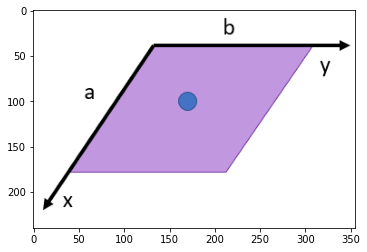

In [ ]:
%matplotlib inline
pil_im = Image.open('particle.png', 'r')
imshow(np.asarray(pil_im))

Równanie Schrodingera w drugim wymiarze:
$$-\frac{\hbar^2}{2 M}\Big ( \frac{\partial ^2 \Psi}{\partial x^2}+\frac{\partial ^2 \Psi}{\partial y^2} \Big ) + V(x, y)\Psi(x, y)= E \Psi (x, y)$$
Ponieważ w obszarze $x \in [0, a] $ i $y \in [0, b]$ potencjał studni $V(x, y)=0$ otrzymujemy:
$$-\frac{\hbar^2}{2 M}\Big ( \frac{\partial ^2 \Psi}{\partial x^2}+\frac{\partial ^2 \Psi}{\partial y^2} \Big )= E \Psi (x, y)$$
W pozostałym obszarze $V(x, y)=\infty$


Separacja zmiennych. Wyrażamy funkcję dwuwymiarowa jako iloczyn dwóch funkcji jednowymiarowych. Zatem szukamy rozwiązania postaci:
$$\Psi(x, y)= X(x)Y(y)$$
$$-\frac{\hbar^2}{2 M}\Big ( \frac{\partial ^2 \Psi}{\partial x^2}\Big )= E_n X(x)$$
$$-\frac{\hbar^2}{2 M}\Big ( \frac{\partial ^2 \Psi}{\partial y^2}\Big )= E_m Y(y)$$
$$E=E_n+E_m$$


In [ ]:
x = sp.Symbol('x')
y = sp.Symbol('y')
kx = sp.Symbol('k_x', real=True, positive=True)
a = sp.Symbol('a', real=True, positive=True)
b = sp.Symbol('b', real=True, positive=True)
ky = sp.Symbol('k_y', real=True, positive=True)
X= sp.Function('X')
Y= sp.Function('Y')
x, y, X, Y, kx, ky

(x, y, X, Y, k_x, k_y)

In [ ]:
eq1 = sp.Eq(X(x).diff(x, x), -kx**2*X(x))
eq1

Eq(Derivative(X(x), (x, 2)), -k_x**2*X(x))

In [ ]:
sol1=sp.dsolve(eq1, X(x))
sol1

Eq(X(x), C1*sin(k_x*x) + C2*cos(k_x*x))

In [ ]:
eq2 = sp.Eq(Y(y).diff(y, y), -ky**2*Y(y))
eq2

Eq(Derivative(Y(y), (y, 2)), -k_y**2*Y(y))

In [ ]:
sol2=sp.dsolve(eq2, Y(y))
sol2

Eq(Y(y), C1*sin(k_y*y) + C2*cos(k_y*y))

Wyznaczamy stałe całkowania za pomocą:
* warunków brzegowych
$$\Psi(0, y)= \Psi(a, y)=0$$
$$\Psi(x, 0)= \Psi(x, b)=0$$
Zatem $X(0)=X(a)=0$ oraz że $Y(0)=Y(b)=0$

In [ ]:
s1= sol1.subs(x, 0)
s1

Eq(X(0), C2)

In [ ]:
s2= sol2.subs(y, 0)
s2

Eq(Y(0), C2)

$$X(x)= C_1 sin(k_x x)$$
$$X(a)=C_1 sin(k_x a)=0 \hspace{1cm} C_1 \neq 0$$
$$k_x a=n \pi \hspace{0.5cm} \rightarrow \hspace{0.5cm} k_x=\frac{n\pi}{a} $$

$$Y(y)= C_1 sin(k_y y)$$
$$Y(b)=C_1 sin(k_y b)=0 \hspace{1cm} C_1 \neq 0$$
$$k_y b=m \pi \hspace{0.5cm} \rightarrow \hspace{0.5cm} k_y=\frac{m\pi}{b} $$

* normalizacja


Powyższe stałe całkowania zastępujęmy nową stałą N:
$$\Psi(x, y)= N \cdot sin(\frac{n\pi}{a} x)\,sin(\frac{m\pi}{b} y)$$
Wyznaczamy ją z warunku normalizacji
$$\int_0^a \int_0^b |\Psi(x, y)|^2 \, dx dy=1$$
$$N
^2 \int_0^a sin^2(\frac{n\pi}{a} x) \,dx \int_0^b sin^2(\frac{m\pi}{b} y) \, dy=1$$

In [ ]:
n = sp.Symbol('n', integer= True, positive= True) 
a = sp.Symbol('a', real=True)
m = sp.Symbol('m', integer= True, positive= True) 
b = sp.Symbol('b', real=True)
n, m, a, b

(n, m, a, b)

In [ ]:
f1=sp.sin(n*sp.pi*x/a)**2
f1

sin(pi*n*x/a)**2

In [ ]:
sp.integrate(f1, (x, 0, a))

a/2

In [ ]:
f2=sp.sin(m*sp.pi*x/b)**2
f2

sin(pi*m*x/b)**2

In [ ]:
sp.integrate(f2, (x, 0, b))

b/2

$$N^2 \cdot \frac{a}{2} \cdot \frac{b}{2}=1$$
$$N=\frac{2}{\sqrt{ab}}$$
Zakładamy, że $a=b$ więc:
$$N=\frac{2}{a}$$

Zatem otrzymujemy:
$$\Psi_{n,m} (x, y)= \frac{2}{a}\,sin(\frac{n\pi}{a} x)\,sin(\frac{m\pi}{a} y)$$

**Wizualizacja stanów stacjonarnych**

In [ ]:
def Psi(n, m, x, y, t, a = 1.0, h = 1.0, M = 1.0):
    R=np.real((2.0 / a) * np.sin(n * np.pi * x / a) *np.sin(m * np.pi * y / a)* np.exp(-1j * (n**2+m**2) * np.pi**2 * h / (2 * M * a**2) * t))
    return R

In [ ]:
Nfrm = 300

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

xs = np.linspace(0, 1, 100)
ys = np.linspace(0, 1, 100)
X, Y = np.meshgrid(xs, ys)
plt.close()
ax.set_zlim(-2, 2)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
n=3
m=3

wframe = None
Z = Psi(n, m, X, Y, 0)
def animate(i):
    t=tt[i]
    global wframe
    if wframe:
        ax.collections.remove(wframe)
    Z = Psi(n, m, X, Y, t)
    wframe = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="winter", linewidth=0.5)
    
tt = np.linspace(0, 1, 300)
ani = animation.FuncAnimation(fig, animate, Nfrm, interval=50)
HTML(ani.to_html5_video())

**Drabinka energetyczna**

$$E_{n,m}=E_n +E_m$$
$$E_{n,m}=\frac{\hbar^2 \pi^2}{2 M a^2} (n^2+m^2)$$

In [ ]:
def Energy(n,m, a = 1.0, h = 1.0, M = 1.0): 
    return (h**2*np.pi**2)/(2* M*a**2)*(n**2+m**2)

Text(0, 0.5, '$E_{n,m}$')

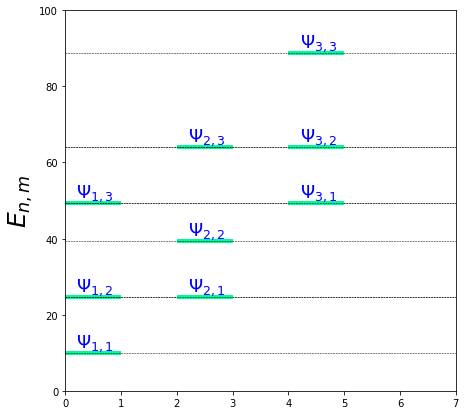

In [ ]:
fig = plt.figure(figsize=(7,7))
plt.axis([0, 7, 0, 100])
for n in range(1,4):
    for m in range(1, 4):
        str1='$'+r'\Psi_{'+str(n)+r','+str(m)+r'}$'
        plt.text(n*2-1.8, Energy(n,m)+ 1.5, str1, fontsize=18, color="blue")
        plt.hlines(Energy(n,m), n*2-2, n*2-1, linewidth=4, color="mediumspringgreen")
        plt.hlines(Energy(n,m), 0.0, 7, linewidth=0.5, linestyle='--', color="black")
plt.ylabel('$E_{n,m}$', fontsize = 25)

# Gaussowska paczka falowa w dwóch wymiarach

In [1]:
import sympy as sp
sp.init_printing()
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
from sympy.utilities.lambdify import lambdify
from mpl_toolkits.mplot3d import Axes3D
from sympy.utilities.lambdify import lambdify, implemented_function
import numpy as np
import scipy.integrate as integrate

In [6]:
def PsiN_xt(n, x, t, a = 1.0, h = 1.0, M = 1.0):
    return np.sqrt(2.0 / a) * np.sin(n * np.pi * x / a) * np.exp(-1j * n**2 * np.pi**2 * h / (2 * M * a**2) * t)

In [9]:
def PsiM_yt(m, y, t, a = 1.0, h = 1.0, M = 1.0):
    return np.sqrt(2.0 / a) * np.sin(m * np.pi * y / a) * np.exp(-1j * m**2 * np.pi**2 * h / (2 * M * a**2) * t)

In [8]:
def PsiSumx(x, t, cn):
    ys = np.zeros_like(x, dtype = np.complex128)
    norm = np.sqrt(np.sum(np.abs(np.array([*cn.values()]))**2))
    for k, v in cn.items():
        ys += v * PsiN_xt(k, x, t) / norm
    return ys

In [10]:
def PsiSumy(y, t, cm):
    ys = np.zeros_like(y, dtype = np.complex128)
    norm = np.sqrt(np.sum(np.abs(np.array([*cm.values()]))**2))
    for k, v in cm.items():
        ys += v * PsiM_yt(k, y, t) / norm
    return ys

In [17]:
L = 10
def psi0x(x):
    if(x<=L and x>=0):
        return 0.4*np.exp(-(x-2)**2);
    else:
        return 0;
def psi0y(y):
    if(y<=L and y>=0):
        return 0.4*np.exp(-(y-2)**2)*np.exp(complex(0,2*y));
    else:
        return 0;    
#stationary states (time independent part)
def psi_nx(x,n):
    if(x>=0 and x<=L):
        return np.sqrt(2/L)*np.sin(n*np.pi*x/L);
    else:
        return 0;
def psi_ny(y,m):
    if(y>=0 and y<=L):
        return np.sqrt(2/L)*np.sin(m*np.pi*y/L);
    else:
        return 0;
    

c1 = np.zeros(100,dtype = np.complex_);
c2 = np.zeros(100,dtype = np.complex_);

for i in range(100):
    n = i+1;
    I_Real = lambda x: psi_nx(x,n)*np.real(psi0x(x));
    I_Imag = lambda x: psi_nx(x,n)*np.imag(psi0x(x));
    c1[i] = complex(integrate.quad(I_Real,0,L)[0],integrate.quad(I_Imag,0,L)[0]);
    
for i in range(100):
    m = i+1;
    I_Real = lambda y: psi_ny(y,m)*np.real(psi0y(y));
    I_Imag = lambda y: psi_ny(y,m)*np.imag(psi0y(y));
    c2[i] = complex(integrate.quad(I_Real,0,L)[0],integrate.quad(I_Imag,0,L)[0]);   

In [18]:
cn = {i : c1[i] for i in range(1, 60)}
cm = {i : c2[i] for i in range(1, 60)}

In [19]:
def PsiSum(x, y, t, cn, cm):
    return PsiSumx(x, t, cn)*PsiSumx(y, t, cm)

In [21]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')

xs = np.linspace(0, 1, 100)
ys = np.linspace(0, 1, 100)
X, Y = np.meshgrid(xs, ys)
plt.close()

ax.set_zlim(0, 40)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
wframe = None
def animate(i):
    t=tt[i]
    global wframe
    if wframe:
        ax.collections.remove(wframe)
    Z = np.abs(PsiSum(X, Y, t, cn, cm))**2
    wframe = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='plasma', linewidth=1)
    
tt = np.linspace(0, 0.05, 800)
ani = animation.FuncAnimation(fig, animate, 800, interval=20)
HTML(ani.to_html5_video())